In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Input/Output
###### Input
```python
# For urls to work I had to paste into shell: /Applications/Python\ 3.6/Install\ Certificates.command
pd.read_csv(filename/url=) # From a CSV file .dropna(how="all)
pd.read_table(filename) # From a delimited text file (like TSV)
pd.read_excel(filename) # From an Excel file
pd.read_sql(query, connection_object) # Read from a SQL table/database
pd.read_json(json_string) # Read from a JSON formatted string, URL or file.
pd.read_html(url) # Parses an html URL, string or file and extracts tables to a list of dataframes
pd.read_clipboard() # Takes the contents of your clipboard and passes it to read_table()
pd.DataFrame(dict) # From a dict, keys for columns names, values for data as lists
```

###### Output to excel... 3 steps
```python
excel_file = pd.ExcelWriter(path, engine=None, **kwargs) # Class for writing DataFrame objects into excel sheets, default is to use xlwt for xls, openpyxl for xlsx.  See DataFrame.to_excel for typical usage.
df.to_excel(excel_file, sheet_name='df', index=False, columns=['col1', 'col2']) # Write to an Excel file
excel_file.save()
```
###### Output to SQL
```python
df.to_sql(table_name, connection_object) # Write to a SQL table
```

###### Other Output
```python
df.to_csv(filename, index=, columns=, encoding='utf-8') # Write to a CSV file
df.to_json(filename) # Write to a file in JSON format
```

# Viewing/Inspecting Data
```python
df.info() # Index, Datatype and Memory information
df.describe() # Summary statistics for numerical columns
df.head(n) # First n rows of the DataFrame
df.tail(n) # Last n rows of the DataFrame
df.shape() # Number of rows and columns
s.value_counts(dropna=False) # View unique values and counts
df.apply(pd.Series.value_counts) # Unique values and counts for all columns
```

# Data Cleaning
###### Indexes/Columns
```python
df.set_index('column_one') # Change the index
df.sort_index(inplace=True) # sorting the index allows panda to access/index faster with future methods. 
df.sort_index(ascending=[True, False]) # Sorting can be done with multiIndex
df.reset_index() # Put index back to a col, and numerate the index as original
df.set_index(keys=['col1','col2']) # Makes a multi-index with col1-col2, least-most indexes
df.index.get_level_values(level) # Return vector of label values for requested level, equal to the length of the index
df.index.set_names(['index1_name', 'index2_name']) # set new names for indices1/2
df.columns/index = ['a','b','c'] # Rename columns/index
df.columns/index = [i.replace(" ", "_") for i in df.columns] # Replace column/index heading spaces " ", with underscores"_"
df.rename(columns/index=lambda x: x + 1) # Mass renaming of columns/index
df.rename(columns={'old_name': 'new_ name'}) # Selective renaming
df.swaplevel(i=-2, j=-1, axis=0) # Swap levels i and j in a MultiIndex on a particular axis
df.stack().to_frame() # puts cols into index giving a 1d series. Can be converted to a df with to_frame(). Level can be index num, name or list.
df.unstack() # puts index into cols
df.unstack(level=-1, fill_value=None)# Pivot a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex). The level involved will automatically get sorted.
df.pivot(index=None, columns=None, values=None) # Reshape data (produce a "pivot" table) based on column values. Uses unique values from index / columns to form axes of the resulting DataFrame.
df.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All') # Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.
df.melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None) # "Unpivots" a DataFrame from wide format to long format, optionally leaving identifier variables set.
```

###### Strings
```python
df.s = df.s.str.replace("x", "y") # Replace "x" with "y" in all cells of series s
df.s.str.lower().str.contains("x") # returns a Boolean for all cells in s containing lower case x
df.s.str.lower().str.startswith("x") # returns a Boolean for all cells in s cstarting with x (endswith)
df.s.str.lstrip() # removes whitespace from left of string
df.s.str.split(",").str.get(0).str.title() # returns first item as title for all cells in a list split on the comma
df.s.str.split(" ", expand=True, n=3) # makes 3 cols on a table of s
df['col_name'] = df['col_name'].str.title() # puts all values of a col into title, note str prefix
df['str_lengths'] = df['col_name'].str.len() # puts all lengths into new col, note str prefix
```

###### na/nulls
```python
pd.isnull() # Checks for null Values, Returns Boolean Arrray
pd.notnull() # Opposite of pd.isnull()
df.dropna(axis=1) # Drop all columns that contain null values
df.dropna(axis=1,thresh=n) # Drop all rows have have less than n non null values
df.drop(labels, axis=0, level=None, inplace=False, errors='raise') #Return new object with labels in requested axis removed.
df.fillna(x) # Replace all null values with x
s.fillna(s.mean()) # Replace all null values with the mean (mean can be replaced with almost any function from the statistics section)
```

###### Replacing data
```python
s.astype('float', 'bool', 'category') # Convert the datatype of the series 
s.replace(1,'one') # Replace all values equal to 1 with 'one'
s.replace([1,3],['one','three']) # Replace all 1 with 'one' and 3 with 'three'
del df.['col']
df.pop('col') # standard popping, can be assign to a variable
```

# Dates
```python
# if Start Date is a string object like '01/31/2018'
df['Start Date'] = pd.to_datetime(df['Start Date'])
```

# Data Selection
###### Indexing
```python
df[col] # Returns column with label col as Series
df[[col1, col2]] # Returns columns as a new DataFrame
s.iloc[0] # Selection by position
df.loc[('index1', 'index2'), 'col1'] # select rows based upon multi-indexing
df.loc['index_one', ['col1','col2']] # Selection by index and extract col vals for that index
df.loc[boolean_series, "col1"] = "New value"  # Change value for specific values in a series/df
df.iloc[0,:] # First row
df.iloc[0,0] # First element of first column
```

###### reshaping
```python
df.pivot_table(index=col1,values=[col2,col3],aggfunc=mean) # Create a pivot table that groups by col1 and calculates the mean of col2 and col3
df.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None) # Returns a random sample of items from an axis of object.
df.transpose(*args, **kwargs) # Transpose index and columns
", ".join(str(name) for name in s["col_name"]) # makes a continuous, comma-space separated string
```

###### groupby and agg
```python
df.groupby(col) # Returns a groupby object for values from one column
df.groupby([col1,col2]) # Returns groupby object for values from multiple columns
df.groupby(col1)[col2] # Returns the mean of the values in col2, grouped by the values in col1 (mean can be replaced with almost any function from the statistics section)
groupby_object.get_group(('col1_val', 'col2_val')) # show multi_indexed group
groupby_object.agg({'col1': "mean", "col2": "mean"}) # dict for each column and agg func
groupby_object.agg(["size", "sum", "mean"]) # performs list funcs on all cols
df.groupby(col1).agg(np.mean) # Find the average across all columns for every unique col1 group

# iterate over groups and output top group with largest values in col_name to new_df
new_df = pd.DataFrame(columns=df.columns) # gives same col headings as original df
for group, data in group_obj:
    largest = data.nlargest(1, "col_name")
    new_df = new_df.append(largest)
new_df 
```

###### selections based upon data
```python
df[df[col] > 0.5] # Rows where the column col is greater than 0.5
df[(df[col] > 0.5) & (df[col] < 0.7)] # Rows where 0.7 > col > 0.5
df[col1].isin([col1-v1, col1-v2, col1-v3]) # Boolean series with multiple values
df.sort_values(col2,ascending=False) # Sort values by col2 in descending order
df.sort_values([col1,col2],ascending=[True,False]) # Sort values by col1 in ascending order then col2 in descending order
df[col1].between(val1, val2) # between returns a boolean series
df.duplicated(subset=None, keep='first') # Return boolean Series denoting duplicate rows, keep can be True/False
df.drop_duplicates(subset=None, keep='first', inplace=False) # Return df with duplicate rows removed, optionally only considering certain columns
df.s.unique() # return list of unique values
df.s.nunique() # return number of unique values, drops na by default
df.s2 = df.s1.rank(ascending=False).astype("int") # insert a col s2 based upon s1 ranks
df.apply(np.mean) # Apply the function np.mean() across each column
nf.apply(np.max,axis=1) # Apply the function np.max() across each row
df.nlargest(n, columns, keep='first') # Get the rows of a DataFrame sorted by the `n` largest values of `columns`.
df.nsmallest(n, columns, keep='first') # Get the rows of a DataFrame sorted by the `n` smallest values of `columns`.
df.where(cond/bool_ser, other=nan, inplace=False, axis=None, level=None, try_cast=False, raise_on_error=True) # Return an object of same shape as self and whose corresponding entries are from self where cond is True and otherwise are from other.
df.query(expr, inplace=False, **kwargs) # Query the columns of a frame with a boolean (plus 'and'/'or') expression. Requires column names  free of spaces
```

# Merge/Combine/Concat
```python
df.copy(deep=True) # Make a copy of this objects data. Good for isolating and working on series of a df.
df1.append(df2) # Add the rows in df1 to the end of df2 (columns should be identical)
pd.concat([df1, df2],axis=1) # Add the columns in df1 to the end of df2 (rows should be identical)
df1.join(df2,on=col1,how='inner') # SQL-style join the columns in df1 with the columns on df2 where the rows for col have identical values. how can be one of 'left', 'right', 'outer', 'inner'
```

# Panels
3d dataframe


# Data distributions & descriptors
```python
df.mean() # Returns the mean of all columns
df.corr() # Returns the correlation between columns in a DataFrame
df.count() # Returns the number of non-null values in each DataFrame column
df.max() # Returns the highest value in each column
df.min() # Returns the lowest value in each column
df.median() # Returns the median of each column
df.std() # Returns the standard deviation of each column
s.nunique() # number un
```

# Vizualization

# Distribution Plots

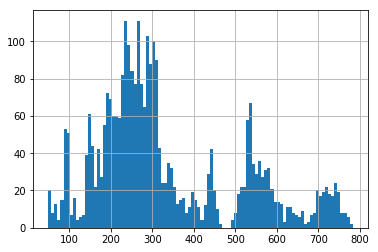

In [2]:
# Plot a histogram from a pandas dataframe
google = pd.read_csv(
    'pandas/udemy_material/google_stock_price.csv', squeeze=True)
google.hist(bins=100)
plt.show()

# Other common plots

In [3]:
nba = pd.read_csv('pandas/udemy_material/nba.csv')
nba.head(3)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN


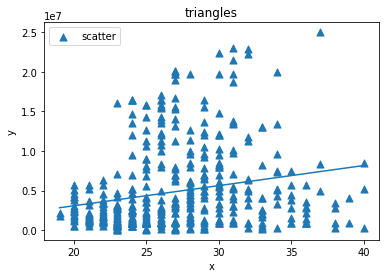

Pearson's corr is :  (0.2134594651585716, 5.419427879087685e-06)


In [4]:
# Drop the NaNs and plot a scatter
nba.dropna(subset=['Salary', 'Age'], inplace=True)

x = nba['Age']
y = nba['Salary']

plt.scatter(x,y, label='scatter', marker='^', s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('triangles')
plt.legend()
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

print("Pearson's corr is : ", ss.pearsonr(x, y))

# scipy.stats functions
```python
describe(a[, axis, ddof, bias, nan_policy])	# Compute several descriptive statistics of the passed array.
kurtosis(a[, axis, fisher, bias, nan_policy]) # Compute the kurtosis (Fisher or Pearson) of a dataset.
kurtosistest(a[, axis, nan_policy])	# Test whether a dataset has normal kurtosis.
mode(a[, axis, nan_policy])	# Return an array of the modal (most common) value in the passed array.
normaltest(a[, axis, nan_policy]) # Test whether a sample differs from a normal distribution.
skew(a[, axis, bias, nan_policy]) # Compute the skewness of a data set.
skewtest(a[, axis, nan_policy]) # Test whether the skew is different from the normal distribution.
variation(a[, axis, nan_policy]) # Compute the coefficient of variation, the ratio of the biased standard deviation to the mean.
cumfreq(a[, numbins, defaultreallimits, weights]) # Return a cumulative frequency histogram, using the histogram function.
itemfreq(a) # Return a 2-D array of item frequencies.
relfreq(a[, numbins, defaultreallimits, weights]) # Return a relative frequency histogram, using the histogram function.
binned_statistic(x, values[, statistic, ...]) # Compute a binned statistic for one or more sets of data.
sem(a[, axis, ddof, nan_policy]) # Calculate the standard error of the mean (or standard error of measurement) of the values in the input array.
zmap(scores, compare[, axis, ddof]) # Calculate the relative z-scores.
zscore(a[, axis, ddof]) # Calculate the z score of each value in the sample, relative to the sample mean and standard deviation.
iqr(x[, axis, rng, scale, nan_policy, ...]) # Compute the interquartile range of the data along the specified axis.
f_oneway(*args)	# Performs a 1-way ANOVA.
pearsonr(x, y) # Calculate a Pearson correlation coefficient and the p-value for testing non-correlation.
spearmanr(a[, b, axis, nan_policy]) # Calculate a Spearman rank-order correlation coefficient and the p-value to test for non-correlation.
linregress(x[, y]) # Calculate a linear least-squares regression for two sets of measurements.
ttest_ind(a, b[, axis, equal_var, nan_policy]) # Calculate the T-test for the means of two independent samples of scores.
ttest_rel(a, b[, axis, nan_policy]) # Calculate the T-test on TWO RELATED samples of scores, a and b.
kstest(rvs, cdf[, args, N, alternative, mode]) # Perform the Kolmogorov-Smirnov test for goodness of fit.
chisquare(f_obs[, f_exp, ddof, axis]) # Calculate a one-way chi square test.
power_divergence(f_obs[, f_exp, ddof, axis, ...]) # Cressie-Read power divergence statistic and goodness of fit test.
ks_2samp(data1, data2) # Compute the Kolmogorov-Smirnov statistic on 2 samples.
mannwhitneyu(x, y[, use_continuity, alternative]) # Compute the Mann-Whitney rank test on samples x and y.
tiecorrect(rankvals) # Tie correction factor for ties in the Mann-Whitney U and Kruskal-Wallis H tests.
rankdata(a[, method]) # Assign ranks to data, dealing with ties appropriately.
ranksums(x, y) # Compute the Wilcoxon rank-sum statistic for two samples.
wilcoxon(x[, y, zero_method, correction]) # Calculate the Wilcoxon signed-rank test.
kruskal(*args, \**kwargs) # Compute the Kruskal-Wallis H-test for independent samples
friedmanchisquare(*args) # Compute the Friedman test for repeated measurements
shapiro(x) # Perform the Shapiro-Wilk test for normality.
```

# Interaction with SQL